In [1]:
using QuantumOptics
using SparseArrays
using Plots
using LinearAlgebra
using ProgressMeter
using Revise
using OffsetArrays
includet("../Scripts/FirstBandApproximation.jl")
includet("../Scripts/ManyBody.jl")
includet("Hofstadter_SP.jl")
includet("../Scripts/Impurity.jl")

In [31]:
Nx = 6
Ny = 6
p = 1
q = 6
pn = 2
U = 1

N = Nx*Ny
t = 1
NPhi0 = Int(Nx*Ny*(p/q))
PN = vcat( ( [i] for i in 0:pn) ... )
Cut_Off = NPhi0

V = 1
NPin = 2

2

In [32]:
matrix = Hofstadter_SP(Nx, Ny, p/q ,0);
H = Sp_Op(N, matrix)
H_sp_Sub, Sub_Basis, P, Pt = H_sub(N, H, Cut_Off)
H_MB = H_Kin_MB(Sub_Basis, PN, H_sp_Sub)
basis_cut_mb, basis_cut_sp = get_Bosonic_MB_Basis(Cut_Off, PN)
H_Total = H_Total_Sub(PN, P, Pt, basis_cut_mb, Cut_Off, U, H_MB);

In [33]:
num_sub_list = get_num_sub_list(N, P, Pt)
Sub_Number_MB_Operator_List = get_num_mb_op(N, basis_cut_sp, num_sub_list, basis_cut_mb);

In [34]:
V0 = [V, V]; Imp_Site = [1, 5]
Impurity_Data = Impurity(V0, Imp_Site);

In [35]:
ParameterInfo(NPin, pn, Nx, Ny, p, q)

Lattice: 6x6
The Number of Flux per Unit-Cell (ϕ) = 1//6
Filling Fraction (ν) = 1//3 (The Number of Quasiholes = 2)
The Number of Flux Quanta = 4 (Delocalised Number = 0)
The Total Number of Particle = 2
The Number of State of Ground Degeneracy = 2


In [36]:
Impurity_H = Imp_H(H_Total, Sub_Number_MB_Operator_List, Impurity_Data);

In [37]:
ϵ, λ = eigenstates(Impurity_H);

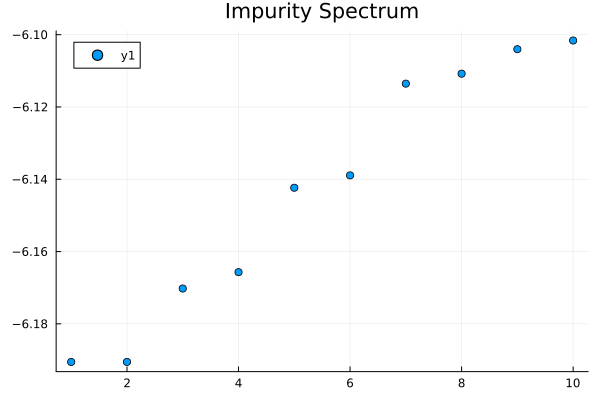

In [38]:
scatter(ϵ[1:10], title="Impurity Spectrum")